In [1]:
import tensorflow as tf
import numpy as np
from tf_powersfa import *

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
n_out = 3

In [3]:
batch_size = 1000
N = 1000

encoding_x = tf.placeholder("float", [N,3])

Wx  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_out]))
b0   = tf.Variable(tf.constant(0.1,shape=[n_out]))

dense0 = tf.matmul(encoding_x, Wx) + b0
dense = alt_power_whitening(dense0, 3, 50)[0]

In [4]:
n_hidden = 32

a, b, c = tf.split(dense, 3, axis=1)


In [5]:
x = tf.concat([b, c], axis=1)
y = a
range_bs = list(range(N))
permuted_bs = list(np.random.permutation(range_bs))
sd_indices =  tf.constant([permuted_bs])
sd_indices   = tf.transpose(sd_indices)
shape        = tf.constant([batch_size,1])
y_    = tf.scatter_nd(sd_indices, y, tf.shape(y))

h_join = tf.concat([y, x], axis=1)
h_marg = tf.concat([y_, x], axis=1)

Wx1  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b1   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx2  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b2   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx3  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b3   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx4  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b4   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx5  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b5   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx6  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b6   = tf.Variable(tf.constant(0.1,shape=[1]))

dense1_joint = tf.nn.leaky_relu(tf.matmul(h_join, Wx1) + b1)
dense2_joint = tf.nn.leaky_relu(tf.matmul(dense1_joint, Wx2) + b2)
dense3_joint = tf.nn.leaky_relu(tf.matmul(dense2_joint, Wx3) + b3)
dense4_joint = tf.nn.leaky_relu(tf.matmul(dense3_joint, Wx4) + b4)
dense5_joint = tf.nn.leaky_relu(tf.matmul(dense4_joint, Wx5) + b5)
dense6_joint = tf.matmul(dense5_joint, Wx6) + b6


dense1_marg = tf.nn.leaky_relu(tf.matmul(h_marg, Wx1) + b1)
dense2_marg = tf.nn.leaky_relu(tf.matmul(dense1_marg, Wx2) + b2)
dense3_marg = tf.nn.leaky_relu(tf.matmul(dense2_marg, Wx3) + b3)
dense4_marg = tf.nn.leaky_relu(tf.matmul(dense3_marg, Wx4) + b4)
dense5_marg = tf.nn.leaky_relu(tf.matmul(dense4_marg, Wx5) + b5)
dense6_marg = tf.matmul(dense5_joint, Wx6) + b6


loss1 = tf.reduce_mean(dense6_joint)-tf.log(tf.reduce_mean(tf.exp(dense6_marg)))


In [6]:
x2 = tf.concat([a, c], axis=1)
y2 = b
range_bs2 = list(range(N))
permuted_bs2 = list(np.random.permutation(range_bs2))
sd_indices2 =  tf.constant([permuted_bs2])
sd_indices2   = tf.transpose(sd_indices2)
y_2    = tf.scatter_nd(sd_indices2, y2, tf.shape(y2))

h_join2 = tf.concat([y2, x2], axis=1)
h_marg2 = tf.concat([y_2, x2], axis=1)

Wx12  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b12   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx22  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b22   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx32  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b32   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx42  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b42   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx52  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b52   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx62  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b62   = tf.Variable(tf.constant(0.1,shape=[1]))

dense1_joint2 = tf.nn.leaky_relu(tf.matmul(h_join2, Wx12) + b12)
dense2_joint2 = tf.nn.leaky_relu(tf.matmul(dense1_joint2, Wx22) + b22)
dense3_joint2 = tf.nn.leaky_relu(tf.matmul(dense2_joint2, Wx32) + b32)
dense4_joint2 = tf.nn.leaky_relu(tf.matmul(dense3_joint2, Wx42) + b42)
dense5_joint2 = tf.nn.leaky_relu(tf.matmul(dense4_joint2, Wx52) + b52)
dense6_joint2 = tf.matmul(dense5_joint2, Wx62) + b62


dense1_marg2 = tf.nn.leaky_relu(tf.matmul(h_marg2, Wx12) + b12)
dense2_marg2 = tf.nn.leaky_relu(tf.matmul(dense1_marg2, Wx22) + b22)
dense3_marg2 = tf.nn.leaky_relu(tf.matmul(dense2_marg2, Wx32) + b32)
dense4_marg2 = tf.nn.leaky_relu(tf.matmul(dense3_marg2, Wx42) + b42)
dense5_marg2 = tf.nn.leaky_relu(tf.matmul(dense4_marg2, Wx52) + b52)
dense6_marg2 = tf.matmul(dense5_marg2, Wx62) + b62


loss2 = tf.reduce_mean(dense6_joint2)-tf.log(tf.reduce_mean(tf.exp(dense6_marg2)))


In [7]:
x3 = tf.concat([b, a], axis=1)
y3 = c
range_bs3 = list(range(N))
permuted_bs3 = list(np.random.permutation(range_bs3))
sd_indices3 =  tf.constant([permuted_bs3])
sd_indices3   = tf.transpose(sd_indices3)
y_3    = tf.scatter_nd(sd_indices3, y3, tf.shape(y3))

h_join3 = tf.concat([y3, x3], axis=1)
h_marg3 = tf.concat([y_3, x3], axis=1)

Wx13  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b13   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx23  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b23   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx33  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b33   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx43  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b43   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx53  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b53   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx63  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b63   = tf.Variable(tf.constant(0.1,shape=[1]))

dense1_joint3 = tf.nn.leaky_relu(tf.matmul(h_join3, Wx13) + b13)
dense2_joint3 = tf.nn.leaky_relu(tf.matmul(dense1_joint3, Wx23) + b23)
dense3_joint3 = tf.nn.leaky_relu(tf.matmul(dense2_joint3, Wx33) + b33)
dense4_joint3 = tf.nn.leaky_relu(tf.matmul(dense3_joint3, Wx43) + b43)
dense5_joint3 = tf.nn.leaky_relu(tf.matmul(dense4_joint3, Wx53) + b53)
dense6_joint3 = tf.matmul(dense5_joint3, Wx63) + b63


dense1_marg3 = tf.nn.leaky_relu(tf.matmul(h_marg3, Wx13) + b13)
dense2_marg3 = tf.nn.leaky_relu(tf.matmul(dense1_marg3, Wx23) + b23)
dense3_marg3 = tf.nn.leaky_relu(tf.matmul(dense2_marg3, Wx33) + b33)
dense4_marg3 = tf.nn.leaky_relu(tf.matmul(dense3_marg3, Wx43) + b43)
dense5_marg3 = tf.nn.leaky_relu(tf.matmul(dense4_marg3, Wx53) + b53)
dense6_marg3 = tf.matmul(dense5_marg3, Wx63) + b63


loss3 = tf.reduce_mean(dense6_joint3)-tf.log(tf.reduce_mean(tf.exp(dense6_marg3)))


In [8]:
estimator_loss = -(loss1+loss2+loss3)
encoder_loss1 = loss2+loss3
encoder_loss2 = loss1+loss3
encoder_loss3 = loss1+loss2
total_encoder_loss = loss1+loss2+loss3
encoder_lr = 0.005

train_encoder1   = tf.train.AdamOptimizer(encoder_lr).minimize(encoder_loss1, var_list=[Wx, b0])
train_encoder2   = tf.train.AdamOptimizer(encoder_lr).minimize(encoder_loss2, var_list=[Wx, b0])
train_encoder3   = tf.train.AdamOptimizer(encoder_lr).minimize(encoder_loss3, var_list=[Wx, b0])

train_encoders = tf.train.AdamOptimizer(encoder_lr).minimize(total_encoder_loss, var_list=[Wx, b0])
estimator_vars = [Wx1,  b1,  Wx2,  b2,  Wx3,  b3,  Wx4,  b4,  Wx5,  b5,  Wx6,  b6,
                  Wx12, b12, Wx22, b22, Wx32, b32, Wx42, b42, Wx52, b52, Wx62, b62,
                  Wx13, b13, Wx23, b23, Wx33, b33, Wx43, b43, Wx53, b53, Wx63, b63]

regularizer = tf.contrib.layers.l2_regularizer(scale=0.001)

for var in estimator_vars:
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, var)
reg_variables = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
reg_term = tf.contrib.layers.apply_regularization(regularizer, reg_variables)
estimator_loss += reg_term
train_estimators =  tf.contrib.opt.NadamOptimizer(0.005).minimize(estimator_loss, var_list=estimator_vars) 

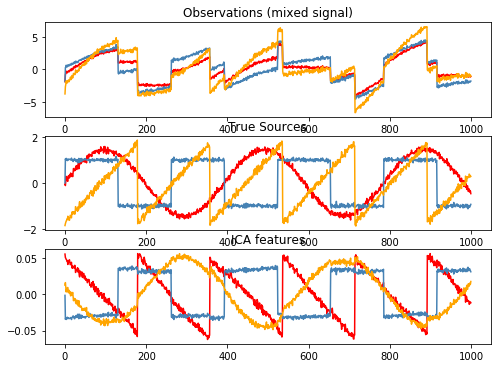

In [9]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from scipy import signal

time = np.linspace(0, 8, batch_size)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(1.4 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.05 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1  , 1, 1],
              [0.5, 2, 1.0],
              [1.5, 1.0, 2.0]])  # Mixing matrixX = np.dot(S, A.T)  # Generate observations
X = np.dot(S, A.T)  # Generate observations

# Solve the task with FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals


models = [X, S, S_]
names = ['Observations (mixed signal)', 'True Sources', 'ICA features']
colors = ['red', 'steelblue', "orange"]
plt.figure(figsize=(8, 8))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
plt.show()

In [10]:
shuffled_x = np.array(X)


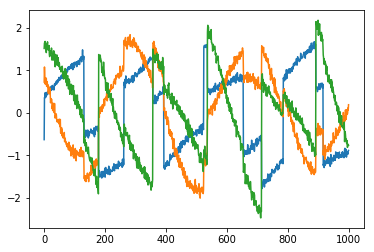

step: 0, loss1: -1.7e-05, loss2: 0.00023, loss3: -9.2e-05, all_loss: 0.00012


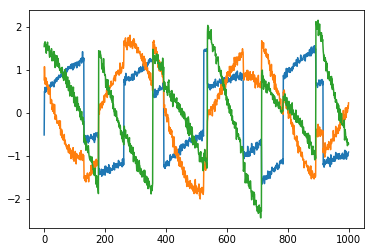

step: 5, loss1: -2.6e-07, loss2: 0.0045, loss3: 0.0066, all_loss: 0.011
step: 10, loss1: -1.1e-07, loss2: 0.012, loss3: 0.026, all_loss: 0.038
step: 15, loss1: -4.7e-09, loss2: 0.064, loss3: 0.083, all_loss: 0.15
step: 20, loss1: 3e-07, loss2: 0.19, loss3: 0.17, all_loss: 0.35
step: 25, loss1: 2.2e-08, loss2: 0.28, loss3: 0.22, all_loss: 0.5
step: 30, loss1: -4.2e-07, loss2: 0.29, loss3: 0.23, all_loss: 0.51
step: 35, loss1: 1.4e-06, loss2: 0.32, loss3: 0.27, all_loss: 0.59
step: 40, loss1: -1.6e-06, loss2: 0.35, loss3: 0.34, all_loss: 0.69
step: 45, loss1: 5.8e-07, loss2: 0.23, loss3: 0.24, all_loss: 0.46
step: 50, loss1: 1.6e-06, loss2: -0.29, loss3: 0.25, all_loss: -0.031
step: 55, loss1: 1.8e-06, loss2: 0.28, loss3: 0.41, all_loss: 0.69
step: 60, loss1: 1e-06, loss2: 0.28, loss3: 0.47, all_loss: 0.75
step: 65, loss1: 7.4e-07, loss2: 0.23, loss3: 0.4, all_loss: 0.64
step: 70, loss1: -1.3e-06, loss2: 0.13, loss3: 0.56, all_loss: 0.69
step: 75, loss1: 1.1e-06, loss2: 0.24, loss3: 0.52

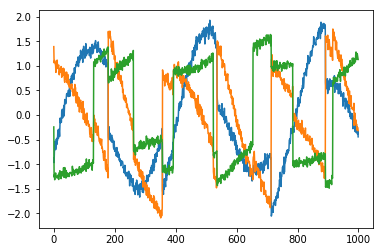

step: 105, loss1: 5.5e-07, loss2: 0.24, loss3: 0.019, all_loss: 0.26
step: 110, loss1: 7.6e-07, loss2: 0.49, loss3: 0.6, all_loss: 1.1
step: 115, loss1: 4.4e-07, loss2: -0.082, loss3: -0.018, all_loss: -0.099
step: 120, loss1: 8.5e-07, loss2: 0.05, loss3: -0.043, all_loss: 0.0066
step: 125, loss1: 5e-07, loss2: 0.048, loss3: 0.035, all_loss: 0.082
step: 130, loss1: 1.1e-06, loss2: 0.048, loss3: 0.12, all_loss: 0.17
step: 135, loss1: 1.3e-06, loss2: 0.065, loss3: 0.15, all_loss: 0.22
step: 140, loss1: -1e-06, loss2: 0.092, loss3: 0.21, all_loss: 0.3
step: 145, loss1: -8.1e-07, loss2: 0.13, loss3: 0.29, all_loss: 0.42
step: 150, loss1: 1e-06, loss2: 0.19, loss3: 0.37, all_loss: 0.56
step: 155, loss1: 2.8e-07, loss2: 0.27, loss3: 0.021, all_loss: 0.29
step: 160, loss1: -5.4e-07, loss2: 0.33, loss3: 0.26, all_loss: 0.58
step: 165, loss1: 6.8e-07, loss2: 0.36, loss3: 0.32, all_loss: 0.68
step: 170, loss1: -1.2e-06, loss2: 0.4, loss3: 0.4, all_loss: 0.8
step: 175, loss1: -6e-07, loss2: 0.41,

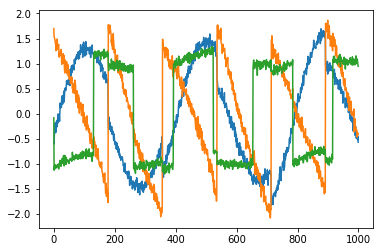

step: 205, loss1: -5.5e-07, loss2: 0.46, loss3: 0.36, all_loss: 0.83
step: 210, loss1: 1.4e-06, loss2: 0.5, loss3: 0.43, all_loss: 0.92
step: 215, loss1: -1.6e-06, loss2: 0.45, loss3: 0.5, all_loss: 0.95
step: 220, loss1: 4.4e-07, loss2: 0.44, loss3: 0.55, all_loss: 0.99
step: 225, loss1: 6.8e-07, loss2: 0.47, loss3: -0.0086, all_loss: 0.46
step: 230, loss1: 7.8e-07, loss2: 0.5, loss3: 0.48, all_loss: 0.98
step: 235, loss1: -7.3e-07, loss2: 0.42, loss3: 0.51, all_loss: 0.92
step: 240, loss1: 9.7e-07, loss2: 0.42, loss3: 0.53, all_loss: 0.95
step: 245, loss1: 5.2e-07, loss2: 0.47, loss3: 0.036, all_loss: 0.5
step: 250, loss1: 1.2e-06, loss2: 0.5, loss3: 0.068, all_loss: 0.57
step: 255, loss1: 4.2e-07, loss2: 0.53, loss3: 0.24, all_loss: 0.77
step: 260, loss1: -1.5e-06, loss2: 0.51, loss3: 0.24, all_loss: 0.75
step: 265, loss1: -7.4e-07, loss2: 0.37, loss3: 0.25, all_loss: 0.62
step: 270, loss1: -1.1e-06, loss2: 0.47, loss3: 0.24, all_loss: 0.71
step: 275, loss1: 1.2e-06, loss2: 0.5, los

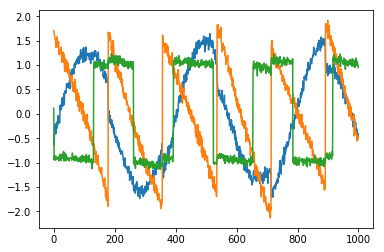

step: 305, loss1: 1.1e-06, loss2: 0.58, loss3: 0.16, all_loss: 0.73
step: 310, loss1: -6e-07, loss2: 0.56, loss3: 0.11, all_loss: 0.67
step: 315, loss1: -6.2e-07, loss2: 0.52, loss3: 0.14, all_loss: 0.66
step: 320, loss1: 1e-06, loss2: 0.56, loss3: 0.12, all_loss: 0.68
step: 325, loss1: -4.8e-07, loss2: 0.59, loss3: 0.11, all_loss: 0.69
step: 330, loss1: -1.2e-06, loss2: 0.61, loss3: 0.11, all_loss: 0.72
step: 335, loss1: -2.6e-07, loss2: 0.51, loss3: 0.16, all_loss: 0.67
step: 340, loss1: 2.6e-08, loss2: 0.5, loss3: 0.18, all_loss: 0.68
step: 345, loss1: -1.3e-06, loss2: 0.57, loss3: 0.19, all_loss: 0.75
step: 350, loss1: 1e-06, loss2: 0.6, loss3: 0.18, all_loss: 0.78
step: 355, loss1: 6.4e-07, loss2: 0.63, loss3: 0.31, all_loss: 0.93
step: 360, loss1: -1.8e-06, loss2: -0.052, loss3: 0.4, all_loss: 0.35
step: 365, loss1: -5.2e-07, loss2: 0.58, loss3: 0.33, all_loss: 0.91
step: 370, loss1: -1.2e-06, loss2: 0.61, loss3: 0.39, all_loss: 1.0
step: 375, loss1: -4.3e-07, loss2: 0.64, loss3:

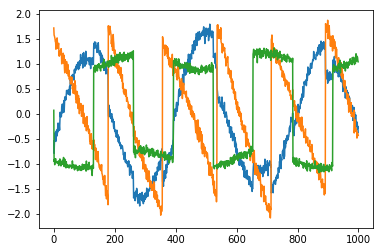

step: 405, loss1: -6.4e-07, loss2: -0.22, loss3: 0.71, all_loss: 0.48
step: 410, loss1: -1.2e-06, loss2: 0.57, loss3: -0.11, all_loss: 0.46
step: 415, loss1: 3.9e-07, loss2: 0.64, loss3: 0.31, all_loss: 0.95
step: 420, loss1: -1.4e-06, loss2: 0.56, loss3: 0.51, all_loss: 1.1
step: 425, loss1: 1.1e-06, loss2: 0.58, loss3: 0.47, all_loss: 1.0
step: 430, loss1: -6.5e-07, loss2: 0.65, loss3: 0.41, all_loss: 1.1
step: 435, loss1: -1.5e-06, loss2: 0.49, loss3: 0.31, all_loss: 0.8
step: 440, loss1: 1e-06, loss2: 0.66, loss3: 0.33, all_loss: 0.98
step: 445, loss1: -8.2e-07, loss2: 0.53, loss3: -0.14, all_loss: 0.4
step: 450, loss1: 6e-07, loss2: 0.65, loss3: 0.072, all_loss: 0.72
step: 455, loss1: 8.1e-07, loss2: 0.54, loss3: 0.092, all_loss: 0.63
step: 460, loss1: -1.1e-06, loss2: 0.58, loss3: 0.048, all_loss: 0.63
step: 465, loss1: -7.6e-07, loss2: 0.61, loss3: 0.051, all_loss: 0.67
step: 470, loss1: 1.5e-06, loss2: 0.44, loss3: 0.057, all_loss: 0.49
step: 475, loss1: 1.7e-06, loss2: 0.64, l

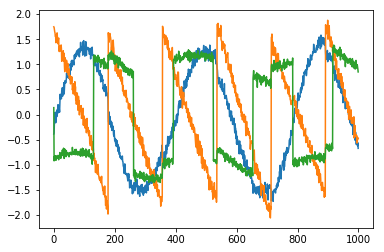

step: 505, loss1: -6.5e-07, loss2: 0.57, loss3: 0.38, all_loss: 0.94
step: 510, loss1: -1.3e-06, loss2: 0.58, loss3: 0.43, all_loss: 1.0
step: 515, loss1: 3.7e-09, loss2: 0.47, loss3: 0.5, all_loss: 0.97
step: 520, loss1: 8.9e-08, loss2: 0.58, loss3: 0.58, all_loss: 1.2
step: 525, loss1: 7.5e-07, loss2: 0.6, loss3: 0.66, all_loss: 1.3
step: 530, loss1: -1.5e-07, loss2: 0.56, loss3: -0.27, all_loss: 0.3
step: 535, loss1: 1.9e-06, loss2: 0.6, loss3: 0.43, all_loss: 1.0
step: 540, loss1: -3.3e-07, loss2: 0.55, loss3: 0.8, all_loss: 1.4
step: 545, loss1: 1.1e-06, loss2: 0.62, loss3: 0.73, all_loss: 1.4
step: 550, loss1: -1.4e-06, loss2: 0.62, loss3: 0.65, all_loss: 1.3
step: 555, loss1: 6.7e-07, loss2: 0.54, loss3: 0.73, all_loss: 1.3
step: 560, loss1: 1.3e-06, loss2: 0.6, loss3: 0.88, all_loss: 1.5
step: 565, loss1: 5.7e-07, loss2: 0.51, loss3: 0.96, all_loss: 1.5
step: 570, loss1: 1.2e-06, loss2: 0.52, loss3: 0.56, all_loss: 1.1
step: 575, loss1: -1.5e-06, loss2: 0.59, loss3: -0.065, all

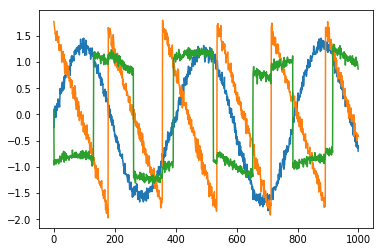

step: 605, loss1: 1.2e-07, loss2: 0.59, loss3: 0.81, all_loss: 1.4
step: 610, loss1: 6.5e-07, loss2: 0.57, loss3: 0.077, all_loss: 0.65
step: 615, loss1: -1.3e-06, loss2: 0.41, loss3: 0.039, all_loss: 0.45
step: 620, loss1: -1.5e-06, loss2: 0.54, loss3: 0.3, all_loss: 0.84
step: 625, loss1: -9.9e-07, loss2: 0.54, loss3: 0.28, all_loss: 0.82
step: 630, loss1: 1.4e-06, loss2: 0.56, loss3: 0.3, all_loss: 0.86
step: 635, loss1: -1.5e-06, loss2: 0.52, loss3: 0.23, all_loss: 0.75
step: 640, loss1: 7.2e-07, loss2: 0.45, loss3: 0.15, all_loss: 0.59
step: 645, loss1: -1e-06, loss2: 0.5, loss3: 0.032, all_loss: 0.53
step: 650, loss1: -1.5e-06, loss2: 0.53, loss3: 0.049, all_loss: 0.58
step: 655, loss1: -6.2e-07, loss2: 0.51, loss3: -0.06, all_loss: 0.45
step: 660, loss1: 8e-07, loss2: 0.39, loss3: -0.13, all_loss: 0.26
step: 665, loss1: 6.6e-07, loss2: 0.52, loss3: -0.071, all_loss: 0.45
step: 670, loss1: -9.3e-07, loss2: 0.54, loss3: -0.088, all_loss: 0.45
step: 675, loss1: -1.5e-11, loss2: 0.5

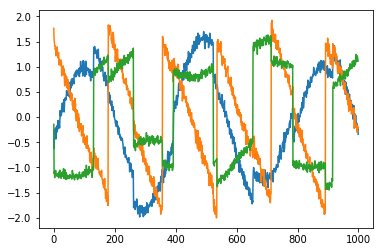

step: 705, loss1: 1.6e-06, loss2: 0.62, loss3: 0.18, all_loss: 0.8
step: 710, loss1: -7.5e-07, loss2: 0.52, loss3: 0.25, all_loss: 0.77
step: 715, loss1: 1.2e-06, loss2: 0.62, loss3: 0.36, all_loss: 0.97
step: 720, loss1: -4.3e-07, loss2: 0.54, loss3: 0.51, all_loss: 1.0
step: 725, loss1: -1.4e-06, loss2: 0.66, loss3: 0.68, all_loss: 1.3
step: 730, loss1: -3.5e-07, loss2: 0.6, loss3: 0.87, all_loss: 1.5
step: 735, loss1: -8.1e-07, loss2: 0.69, loss3: 1.1, all_loss: 1.8
step: 740, loss1: -1e-06, loss2: 0.73, loss3: 0.54, all_loss: 1.3
step: 745, loss1: -9.4e-07, loss2: 0.46, loss3: 1.1, all_loss: 1.6
step: 750, loss1: -8.9e-07, loss2: 0.7, loss3: 1.3, all_loss: 2.0
step: 755, loss1: -8.1e-07, loss2: 0.76, loss3: 1.1, all_loss: 1.9
step: 760, loss1: -2.4e-07, loss2: 0.62, loss3: 1.1, all_loss: 1.7
step: 765, loss1: -1.2e-06, loss2: 0.64, loss3: 1.2, all_loss: 1.9
step: 770, loss1: -4e-07, loss2: 0.62, loss3: 1.3, all_loss: 1.9
step: 775, loss1: -1.4e-06, loss2: 0.7, loss3: 1.3, all_loss:

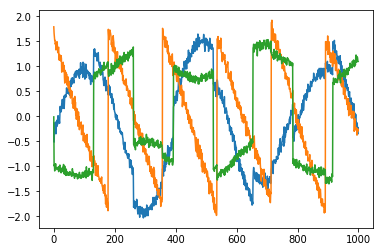

step: 805, loss1: -1.6e-06, loss2: 0.55, loss3: 1.3, all_loss: 1.9
step: 810, loss1: -1e-06, loss2: 0.55, loss3: 1.3, all_loss: 1.8
step: 815, loss1: 9.9e-07, loss2: 0.22, loss3: 1.2, all_loss: 1.4
step: 820, loss1: -7.9e-07, loss2: 0.47, loss3: 1.0, all_loss: 1.5
step: 825, loss1: -8.3e-07, loss2: 0.51, loss3: 1.2, all_loss: 1.7
step: 830, loss1: -1.1e-06, loss2: 0.5, loss3: 1.1, all_loss: 1.6
step: 835, loss1: 1e-06, loss2: 0.49, loss3: 0.95, all_loss: 1.4
step: 840, loss1: 1.4e-06, loss2: 0.55, loss3: 1.0, all_loss: 1.6
step: 845, loss1: -9.3e-07, loss2: 0.28, loss3: 0.94, all_loss: 1.2
step: 850, loss1: -1.1e-06, loss2: 0.54, loss3: 0.84, all_loss: 1.4
step: 855, loss1: -1.1e-06, loss2: 0.57, loss3: 0.7, all_loss: 1.3
step: 860, loss1: 9.3e-07, loss2: 0.62, loss3: 0.83, all_loss: 1.5
step: 865, loss1: -1.1e-06, loss2: 0.44, loss3: 0.81, all_loss: 1.2
step: 870, loss1: 1.1e-06, loss2: 0.56, loss3: 0.74, all_loss: 1.3
step: 875, loss1: 9.8e-07, loss2: 0.64, loss3: 0.75, all_loss: 1.4

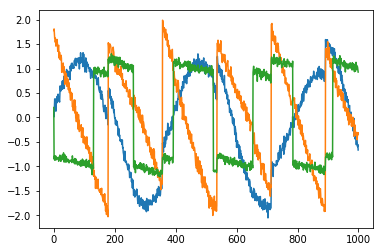

step: 905, loss1: -7e-07, loss2: 0.49, loss3: 0.67, all_loss: 1.2
step: 910, loss1: 3.1e-07, loss2: 0.65, loss3: 0.69, all_loss: 1.3
step: 915, loss1: -1.3e-06, loss2: 0.55, loss3: 0.61, all_loss: 1.2
step: 920, loss1: -8.4e-07, loss2: 0.57, loss3: 0.48, all_loss: 1.0
step: 925, loss1: 1.6e-06, loss2: 0.57, loss3: 0.2, all_loss: 0.77
step: 930, loss1: -7.9e-07, loss2: 0.6, loss3: 0.32, all_loss: 0.91
step: 935, loss1: 7.6e-07, loss2: 0.48, loss3: 0.12, all_loss: 0.61
step: 940, loss1: 8.3e-07, loss2: 0.45, loss3: -0.053, all_loss: 0.39
step: 945, loss1: 1.1e-06, loss2: 0.55, loss3: 0.048, all_loss: 0.6
step: 950, loss1: -6.3e-07, loss2: 0.53, loss3: 0.059, all_loss: 0.59
step: 955, loss1: 1.4e-06, loss2: 0.57, loss3: 0.12, all_loss: 0.69
step: 960, loss1: 1.7e-06, loss2: 0.64, loss3: 0.2, all_loss: 0.84
step: 965, loss1: -1.4e-06, loss2: 0.68, loss3: 0.3, all_loss: 0.98
step: 970, loss1: 9.1e-07, loss2: 0.58, loss3: 0.48, all_loss: 1.1
step: 975, loss1: 1.9e-07, loss2: 0.79, loss3: 0.6

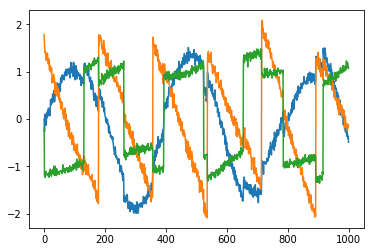

step: 1005, loss1: 9.1e-07, loss2: 0.58, loss3: 1.2, all_loss: 1.8
step: 1010, loss1: -1.4e-06, loss2: 0.87, loss3: 1.2, all_loss: 2.1
step: 1015, loss1: -1.7e-06, loss2: 0.94, loss3: 1.3, all_loss: 2.3
step: 1020, loss1: 7.1e-07, loss2: 0.69, loss3: 1.3, all_loss: 2.0
step: 1025, loss1: 1e-06, loss2: 0.84, loss3: 0.94, all_loss: 1.8
step: 1030, loss1: 5.5e-07, loss2: 0.78, loss3: 0.31, all_loss: 1.1
step: 1035, loss1: -7.9e-07, loss2: 0.83, loss3: 1.1, all_loss: 1.9
step: 1040, loss1: -1.4e-06, loss2: 0.64, loss3: 0.98, all_loss: 1.6
step: 1045, loss1: -3e-08, loss2: 0.64, loss3: 0.79, all_loss: 1.4
step: 1050, loss1: 8.1e-07, loss2: 0.74, loss3: 0.82, all_loss: 1.6
step: 1055, loss1: -1.1e-06, loss2: 0.63, loss3: 0.32, all_loss: 0.94
step: 1060, loss1: 1.3e-06, loss2: 0.53, loss3: 0.19, all_loss: 0.72
step: 1065, loss1: 8.3e-07, loss2: 0.51, loss3: -0.019, all_loss: 0.49
step: 1070, loss1: 1.2e-06, loss2: 0.52, loss3: 0.1, all_loss: 0.62
step: 1075, loss1: 9.8e-07, loss2: 0.48, loss3

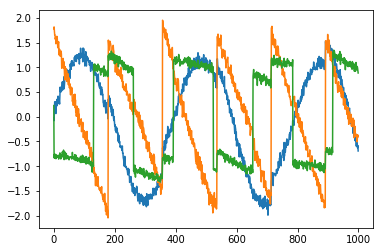

step: 1105, loss1: -1.1e-06, loss2: 0.5, loss3: 0.99, all_loss: 1.5
step: 1110, loss1: 1e-06, loss2: 0.8, loss3: 1.2, all_loss: 2.0
step: 1115, loss1: 1e-06, loss2: 0.81, loss3: 0.62, all_loss: 1.4
step: 1120, loss1: -1.2e-06, loss2: 0.47, loss3: 0.77, all_loss: 1.2
step: 1125, loss1: 8.5e-07, loss2: 0.84, loss3: 1.1, all_loss: 1.9
step: 1130, loss1: 7.7e-07, loss2: 0.83, loss3: 1.3, all_loss: 2.1
step: 1135, loss1: -1.1e-06, loss2: 0.75, loss3: 1.3, all_loss: 2.0
step: 1140, loss1: 1.9e-06, loss2: 0.86, loss3: 1.3, all_loss: 2.2
step: 1145, loss1: 7.1e-07, loss2: 0.48, loss3: 0.8, all_loss: 1.3
step: 1150, loss1: 1.4e-06, loss2: 0.83, loss3: 0.92, all_loss: 1.8
step: 1155, loss1: -1.1e-06, loss2: 0.48, loss3: 1.1, all_loss: 1.6
step: 1160, loss1: -1.2e-06, loss2: 0.82, loss3: 0.99, all_loss: 1.8
step: 1165, loss1: 1.1e-06, loss2: 0.63, loss3: 0.76, all_loss: 1.4
step: 1170, loss1: -1e-06, loss2: 0.48, loss3: 0.44, all_loss: 0.92
step: 1175, loss1: 1.7e-07, loss2: 0.61, loss3: 0.46, al

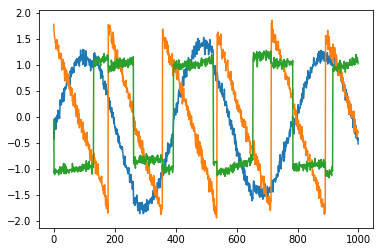

step: 1205, loss1: -7.5e-07, loss2: 0.54, loss3: 0.13, all_loss: 0.67
step: 1210, loss1: 4.9e-07, loss2: 0.62, loss3: 0.2, all_loss: 0.82
step: 1215, loss1: -9.4e-07, loss2: 0.72, loss3: 0.35, all_loss: 1.1
step: 1220, loss1: 8.2e-07, loss2: 0.76, loss3: 0.55, all_loss: 1.3
step: 1225, loss1: 8.2e-07, loss2: 0.61, loss3: 0.75, all_loss: 1.4
step: 1230, loss1: 7.5e-07, loss2: 0.87, loss3: 1.0, all_loss: 1.9
step: 1235, loss1: -1.4e-06, loss2: 0.93, loss3: 1.2, all_loss: 2.2
step: 1240, loss1: -3.8e-07, loss2: 0.49, loss3: 1.4, all_loss: 1.9
step: 1245, loss1: -1.3e-06, loss2: 0.82, loss3: 0.91, all_loss: 1.7
step: 1250, loss1: 1.2e-06, loss2: 0.82, loss3: 1.2, all_loss: 2.0
step: 1255, loss1: -9.5e-07, loss2: 0.85, loss3: 1.3, all_loss: 2.1
step: 1260, loss1: 1.4e-06, loss2: 0.86, loss3: 1.4, all_loss: 2.3
step: 1265, loss1: 9e-07, loss2: 0.96, loss3: 1.5, all_loss: 2.4
step: 1270, loss1: 7.9e-07, loss2: 0.66, loss3: 1.4, all_loss: 2.0
step: 1275, loss1: -1.1e-06, loss2: 0.85, loss3: 1.

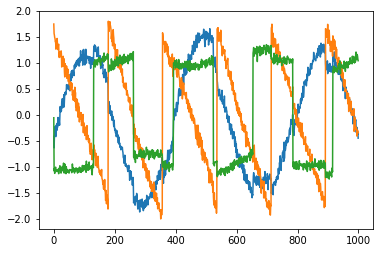

step: 1305, loss1: -9.8e-07, loss2: 0.72, loss3: 0.95, all_loss: 1.7
step: 1310, loss1: -1.5e-06, loss2: 0.66, loss3: 0.41, all_loss: 1.1
step: 1315, loss1: 1e-06, loss2: 0.71, loss3: 0.75, all_loss: 1.5
step: 1320, loss1: 7.2e-07, loss2: 0.69, loss3: 0.56, all_loss: 1.2
step: 1325, loss1: 1.1e-07, loss2: 0.65, loss3: 0.33, all_loss: 0.98
step: 1330, loss1: -1.2e-06, loss2: 0.48, loss3: 0.37, all_loss: 0.85
step: 1335, loss1: 6e-07, loss2: 0.69, loss3: 0.23, all_loss: 0.92
step: 1340, loss1: 1.1e-08, loss2: 0.69, loss3: 0.15, all_loss: 0.84
step: 1345, loss1: -8.4e-07, loss2: 0.5, loss3: 0.23, all_loss: 0.74
step: 1350, loss1: -1.9e-06, loss2: 0.76, loss3: 0.35, all_loss: 1.1
step: 1355, loss1: 1.7e-06, loss2: 0.7, loss3: 0.47, all_loss: 1.2
step: 1360, loss1: 1.1e-06, loss2: 0.71, loss3: 0.66, all_loss: 1.4
step: 1365, loss1: 7.5e-07, loss2: 0.78, loss3: 0.8, all_loss: 1.6
step: 1370, loss1: 1.1e-06, loss2: 0.77, loss3: 0.95, all_loss: 1.7
step: 1375, loss1: -5e-08, loss2: 0.81, loss3

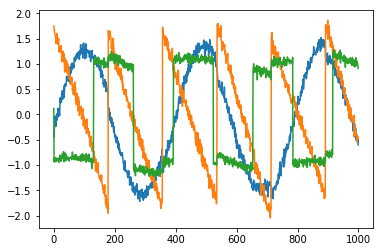

step: 1405, loss1: 1.2e-06, loss2: 0.76, loss3: 0.95, all_loss: 1.7
step: 1410, loss1: 1e-07, loss2: 0.57, loss3: 0.8, all_loss: 1.4
step: 1415, loss1: 5.9e-07, loss2: 0.77, loss3: 0.58, all_loss: 1.3
step: 1420, loss1: 1.6e-06, loss2: 0.78, loss3: 0.69, all_loss: 1.5
step: 1425, loss1: -1.3e-06, loss2: 0.72, loss3: 0.53, all_loss: 1.3
step: 1430, loss1: 1e-06, loss2: 0.71, loss3: 0.39, all_loss: 1.1
step: 1435, loss1: -2.3e-07, loss2: 0.63, loss3: 0.44, all_loss: 1.1
step: 1440, loss1: -8.5e-07, loss2: 0.61, loss3: 0.36, all_loss: 0.97
step: 1445, loss1: -4.1e-07, loss2: 0.65, loss3: 0.31, all_loss: 0.96
step: 1450, loss1: -1.1e-06, loss2: 0.77, loss3: 0.34, all_loss: 1.1
step: 1455, loss1: 6.4e-07, loss2: 0.7, loss3: 0.43, all_loss: 1.1
step: 1460, loss1: 8.4e-07, loss2: 0.81, loss3: 0.51, all_loss: 1.3
step: 1465, loss1: -2e-07, loss2: 0.88, loss3: 0.6, all_loss: 1.5
step: 1470, loss1: -9e-07, loss2: 0.82, loss3: 0.65, all_loss: 1.5
step: 1475, loss1: -1.2e-06, loss2: 0.64, loss3: 0

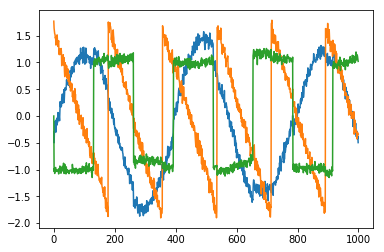

step: 1505, loss1: -1.4e-06, loss2: 0.75, loss3: 0.67, all_loss: 1.4
step: 1510, loss1: -1.4e-06, loss2: 0.48, loss3: 0.59, all_loss: 1.1
step: 1515, loss1: -1.7e-06, loss2: 0.61, loss3: 0.46, all_loss: 1.1
step: 1520, loss1: 5.3e-07, loss2: 0.61, loss3: 0.25, all_loss: 0.86
step: 1525, loss1: -1.2e-06, loss2: 0.62, loss3: 0.34, all_loss: 0.96
step: 1530, loss1: -1.5e-06, loss2: 0.6, loss3: 0.23, all_loss: 0.83
step: 1535, loss1: 5.8e-07, loss2: 0.64, loss3: 0.15, all_loss: 0.8
step: 1540, loss1: 7.9e-08, loss2: 0.64, loss3: 0.22, all_loss: 0.86
step: 1545, loss1: 8.4e-07, loss2: 0.63, loss3: 0.21, all_loss: 0.84
step: 1550, loss1: -1e-06, loss2: 0.73, loss3: 0.24, all_loss: 0.97
step: 1555, loss1: 1.2e-06, loss2: 0.69, loss3: 0.27, all_loss: 0.96
step: 1560, loss1: -1.3e-06, loss2: 0.68, loss3: 0.32, all_loss: 1.0
step: 1565, loss1: 1.5e-06, loss2: 0.74, loss3: 0.37, all_loss: 1.1
step: 1570, loss1: 1.1e-06, loss2: 0.65, loss3: 0.43, all_loss: 1.1
step: 1575, loss1: -5.1e-07, loss2: 0

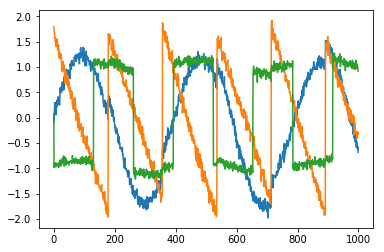

step: 1605, loss1: 7.6e-07, loss2: 0.57, loss3: 0.76, all_loss: 1.3
step: 1610, loss1: -1.2e-06, loss2: 0.64, loss3: 0.81, all_loss: 1.4
step: 1615, loss1: 3.2e-07, loss2: 0.64, loss3: 0.77, all_loss: 1.4
step: 1620, loss1: -7.8e-07, loss2: 0.63, loss3: 0.68, all_loss: 1.3
step: 1625, loss1: 1e-06, loss2: 0.58, loss3: 0.61, all_loss: 1.2
step: 1630, loss1: -7.3e-07, loss2: 0.67, loss3: 0.67, all_loss: 1.3
step: 1635, loss1: 8.9e-07, loss2: 0.71, loss3: 0.64, all_loss: 1.3
step: 1640, loss1: -1.3e-06, loss2: 0.73, loss3: 0.53, all_loss: 1.3
step: 1645, loss1: 1.1e-06, loss2: 0.85, loss3: 0.51, all_loss: 1.4
step: 1650, loss1: 1.3e-06, loss2: 0.67, loss3: 0.52, all_loss: 1.2
step: 1655, loss1: -4.7e-07, loss2: 0.79, loss3: 0.44, all_loss: 1.2
step: 1660, loss1: -1.2e-06, loss2: 0.65, loss3: 0.32, all_loss: 0.98
step: 1665, loss1: 9.2e-07, loss2: 0.84, loss3: 0.39, all_loss: 1.2
step: 1670, loss1: -5.4e-07, loss2: 0.82, loss3: 0.34, all_loss: 1.2
step: 1675, loss1: 1.8e-09, loss2: 0.79, l

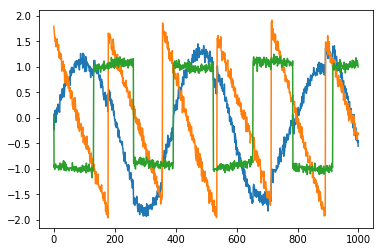

step: 1705, loss1: 5.7e-08, loss2: 0.42, loss3: 0.47, all_loss: 0.88
step: 1710, loss1: -9.3e-07, loss2: 0.67, loss3: 0.5, all_loss: 1.2
step: 1715, loss1: -1e-06, loss2: 0.8, loss3: 0.53, all_loss: 1.3
step: 1720, loss1: 9.6e-07, loss2: 0.84, loss3: 0.54, all_loss: 1.4
step: 1725, loss1: 7.7e-07, loss2: 0.5, loss3: 0.39, all_loss: 0.89
step: 1730, loss1: 6.3e-07, loss2: 0.72, loss3: 0.43, all_loss: 1.2
step: 1735, loss1: 6.6e-07, loss2: 0.86, loss3: 0.49, all_loss: 1.4
step: 1740, loss1: -1.2e-06, loss2: 0.85, loss3: 0.47, all_loss: 1.3
step: 1745, loss1: -1.3e-06, loss2: 0.66, loss3: 0.42, all_loss: 1.1
step: 1750, loss1: -6.4e-07, loss2: 0.73, loss3: 0.43, all_loss: 1.2
step: 1755, loss1: -6.3e-07, loss2: 0.85, loss3: 0.36, all_loss: 1.2
step: 1760, loss1: 1.7e-06, loss2: 0.6, loss3: 0.24, all_loss: 0.84
step: 1765, loss1: 1.8e-06, loss2: 0.69, loss3: 0.13, all_loss: 0.82
step: 1770, loss1: 9e-07, loss2: 0.66, loss3: 0.23, all_loss: 0.88
step: 1775, loss1: 1.2e-06, loss2: 0.62, loss

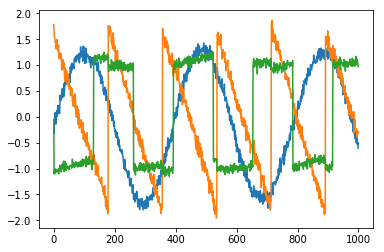

step: 1805, loss1: -8e-07, loss2: 0.73, loss3: 0.49, all_loss: 1.2
step: 1810, loss1: -8e-07, loss2: 0.69, loss3: 0.55, all_loss: 1.2
step: 1815, loss1: -8.5e-07, loss2: 0.76, loss3: 0.52, all_loss: 1.3
step: 1820, loss1: 1.2e-06, loss2: 0.87, loss3: 0.66, all_loss: 1.5
step: 1825, loss1: -8.1e-07, loss2: 0.67, loss3: 0.73, all_loss: 1.4
step: 1830, loss1: 6.3e-07, loss2: 0.87, loss3: 0.73, all_loss: 1.6
step: 1835, loss1: 8.3e-09, loss2: 0.92, loss3: 0.55, all_loss: 1.5
step: 1840, loss1: 1.2e-06, loss2: 0.65, loss3: 0.68, all_loss: 1.3
step: 1845, loss1: -1.1e-06, loss2: 0.87, loss3: 0.69, all_loss: 1.6
step: 1850, loss1: -1e-06, loss2: 0.78, loss3: 0.64, all_loss: 1.4
step: 1855, loss1: -1.7e-06, loss2: 0.9, loss3: 0.67, all_loss: 1.6
step: 1860, loss1: 5.1e-08, loss2: 0.74, loss3: 0.63, all_loss: 1.4
step: 1865, loss1: -1.4e-06, loss2: 0.92, loss3: 0.57, all_loss: 1.5
step: 1870, loss1: 2.1e-07, loss2: 0.83, loss3: 0.47, all_loss: 1.3
step: 1875, loss1: 7.9e-07, loss2: 0.59, loss3:

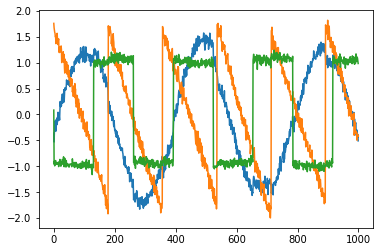

step: 1905, loss1: -6.2e-07, loss2: 0.73, loss3: 0.25, all_loss: 0.98
step: 1910, loss1: 1.3e-06, loss2: 0.77, loss3: 0.31, all_loss: 1.1
step: 1915, loss1: 4e-07, loss2: 0.8, loss3: 0.34, all_loss: 1.1
step: 1920, loss1: -1e-06, loss2: 0.87, loss3: 0.38, all_loss: 1.2
step: 1925, loss1: -8.2e-07, loss2: 0.85, loss3: 0.45, all_loss: 1.3
step: 1930, loss1: 8.6e-07, loss2: 0.62, loss3: 0.52, all_loss: 1.1
step: 1935, loss1: 1.5e-06, loss2: 0.93, loss3: 0.58, all_loss: 1.5
step: 1940, loss1: 9.2e-07, loss2: 1.0, loss3: 0.43, all_loss: 1.4
step: 1945, loss1: 7.3e-07, loss2: 0.95, loss3: 0.57, all_loss: 1.5
step: 1950, loss1: 8.7e-07, loss2: 0.88, loss3: 0.71, all_loss: 1.6
step: 1955, loss1: -1.6e-06, loss2: 0.95, loss3: 0.74, all_loss: 1.7
step: 1960, loss1: -5.1e-07, loss2: 0.87, loss3: 0.75, all_loss: 1.6
step: 1965, loss1: -1.2e-06, loss2: 0.92, loss3: 0.6, all_loss: 1.5
step: 1970, loss1: -1e-06, loss2: 0.7, loss3: 0.62, all_loss: 1.3
step: 1975, loss1: -2.7e-07, loss2: 0.91, loss3: 0

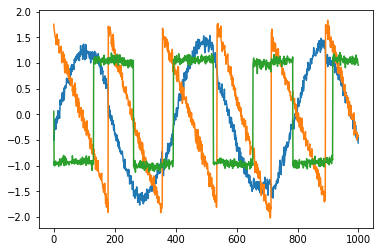

In [11]:
from random import shuffle
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    encoding = sess.run(dense, feed_dict={encoding_x:X})
    plt.plot(encoding)
    plt.show()
    for i in range(2001):
        np.random.shuffle(shuffled_x)
        current_loss1, current_loss2, current_loss3, _ = sess.run([loss1,
                                                    loss2, loss3, train_estimators], feed_dict={encoding_x:X})

        if i % 7   is 0: 
            _ = sess.run(train_encoders, feed_dict={encoding_x:X})

        if i % 5 is 0: 
            print("step: {}, loss1: {:.2}, loss2: {:.2}, loss3: {:.2}, all_loss: {:.2}".format(i,
                                current_loss1, current_loss2, current_loss3, current_loss1+current_loss2+current_loss3))
        if i % 100 is 0:
            encoding = sess.run(dense, feed_dict={encoding_x:X})
            plt.plot(encoding)
            plt.show()